In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
 df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
iris_setosa = df[df['species'] == 'Iris-setosa']
iris_versicolor = df[df['species'] == 'Iris-versicolor']
iris_virginica = df[df['species'] == 'Iris-virginica']

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df_min = df.groupby('species').min()
df_max = df.groupby('species').max()

In [9]:
df_min

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.3,2.3,1.0,0.1
versicolor,4.9,2.0,3.0,1.0
virginica,4.9,2.2,4.5,1.4


In [10]:
df_max

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [11]:
df.pivot_table(index='species', values=df.columns[:4],aggfunc=[np.min, np.max, np.mean, np.median, np.std]).round(2).T

species              setosa  versicolor  virginica
amin   petal_length    1.00        3.00       4.50
       petal_width     0.10        1.00       1.40
       sepal_length    4.30        4.90       4.90
       sepal_width     2.30        2.00       2.20
amax   petal_length    1.90        5.10       6.90
       petal_width     0.60        1.80       2.50
       sepal_length    5.80        7.00       7.90
       sepal_width     4.40        3.40       3.80
mean   petal_length    1.46        4.26       5.55
       petal_width     0.25        1.33       2.03
       sepal_length    5.01        5.94       6.59
       sepal_width     3.43        2.77       2.97
median petal_length    1.50        4.35       5.55
       petal_width     0.20        1.30       2.00
       sepal_length    5.00        5.90       6.50
       sepal_width     3.40        2.80       3.00
std    petal_length    0.17        0.47       0.55
       petal_width     0.11        0.20       0.27
       sepal_length    0.35        0.52       0.64
       sepal_width     0.38        0.31       0.32

C:\Users\ANKITA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


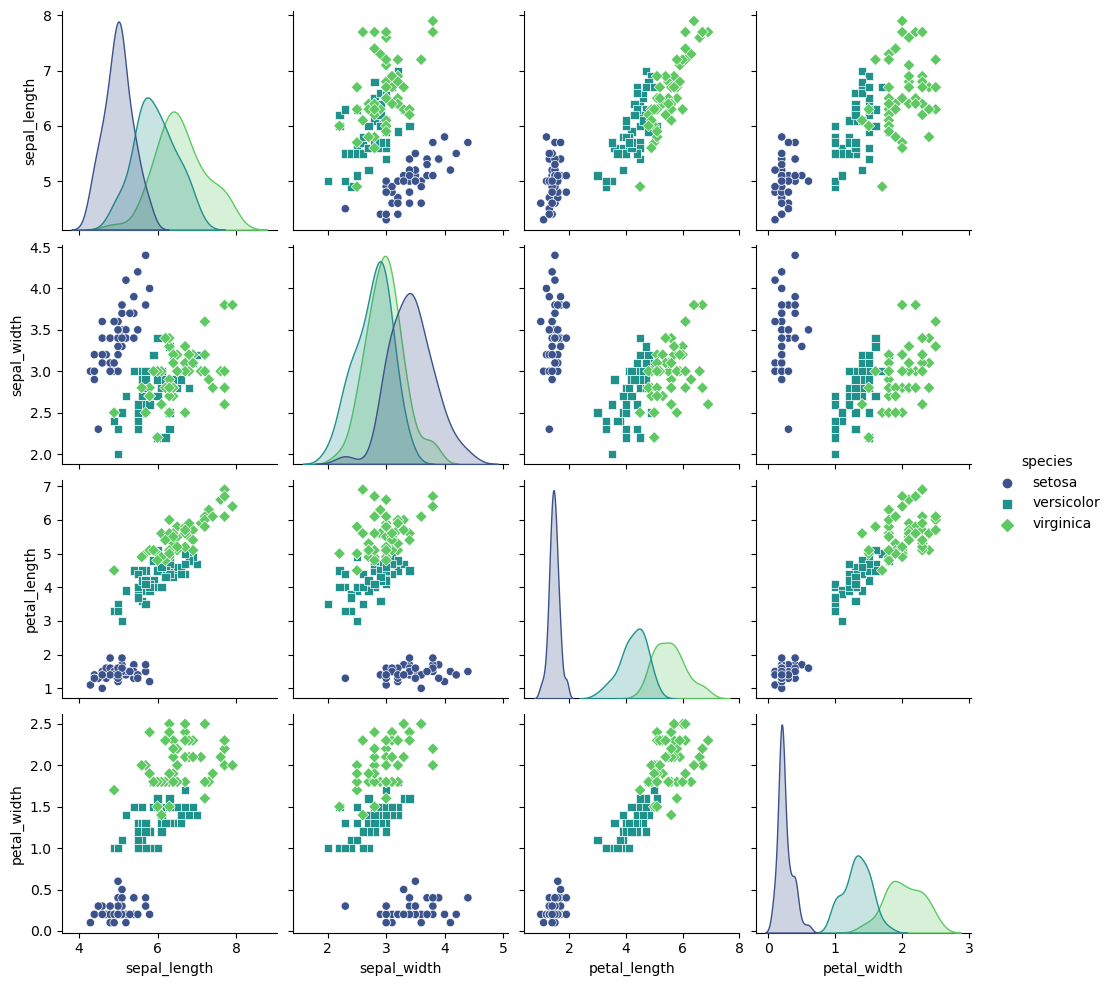

In [12]:
# Visualize pairwise relationships between features
sns.pairplot(df, hue='species', markers=['o', 's', 'D'], palette='viridis')
plt.show()


In [13]:
X = df.drop('species', axis=1)
y = df['species']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
y_pred = model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [19]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [20]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
